#### Importing Required Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing file in dataframe

In [59]:
df = pd.read_csv("data.csv")

In [79]:
df.head(20)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


##### Understanding datatypes of each column

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


##### As rate column is in object format, converting it in a float type

In [62]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [63]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#### Exploring Restaurant Types

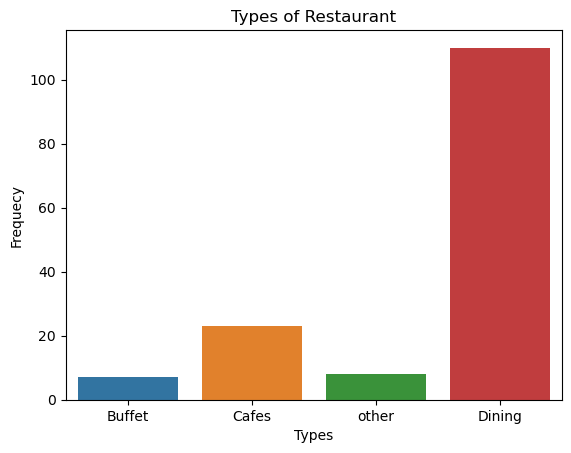

In [64]:
sns.countplot(x=df['listed_in(type)'])
plt.title("Types of Restaurant")
plt.xlabel("Types")
plt.ylabel("Frequecy")
plt.show()

In [65]:
# Conclusion: The majority of the restaurants fall into the dining category.

#### Votes by Restaurant Type

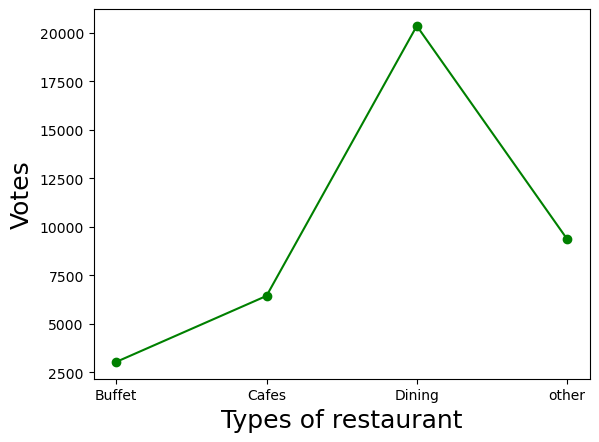

In [66]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
results = pd.DataFrame({'Votes':grouped_data})
plt.plot(results, c='green',marker ='o')
plt.xlabel("Types of restaurant", c='black', size = 18)
plt.ylabel("Votes",c='black',size=18)
plt.show()

In [67]:
# Conclusion: Dining restaurants are preferred by a larger number of individuals.

#### Identify the Most Voted Restaurant

In [68]:
max_votes = df['votes'].max()
res_max_votes = df.loc[df['votes']==max_votes, 'name']
print("Restaurant with most votes: ")
print(res_max_votes)

Restaurant with most votes: 
38    Empire Restaurant
Name: name, dtype: object


#### Online Order Availability

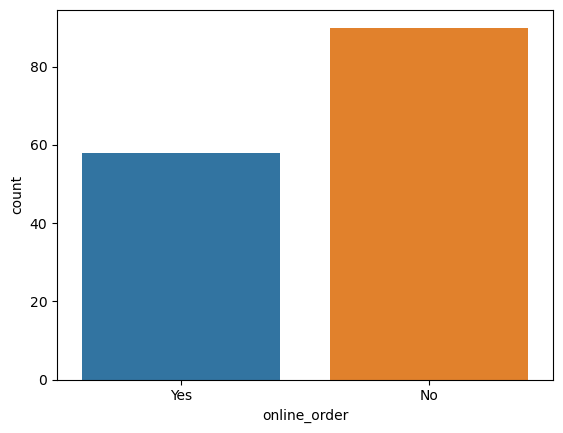

In [69]:
sns.countplot(x=df['online_order'])
plt.show()

In [70]:
# Conclusion: This suggests that a majority of the restaurants do not accept online orders.

#### Analyze Ratings

C:\Users\Ramsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


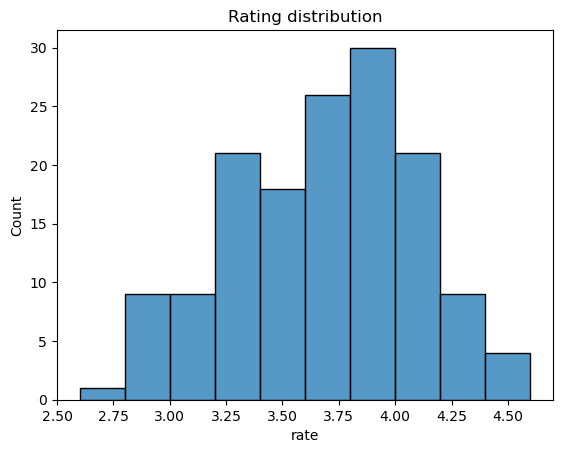

In [71]:
sns.histplot(df['rate'], bins=10)
plt.title('Rating distribution')
plt.show()

In [72]:
# Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

#### Approximate Cost for Couples

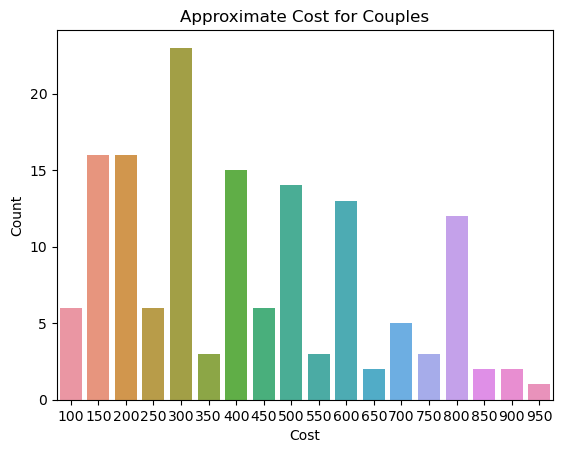

In [73]:
sns.countplot(x=df['approx_cost(for two people)'])
plt.title("Approximate Cost for Couples")
plt.xlabel("Cost",c="black")
plt.ylabel("Count",c="black")
plt.show()

In [74]:
# Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

#### Order Mode Preferences by Restaurant Type

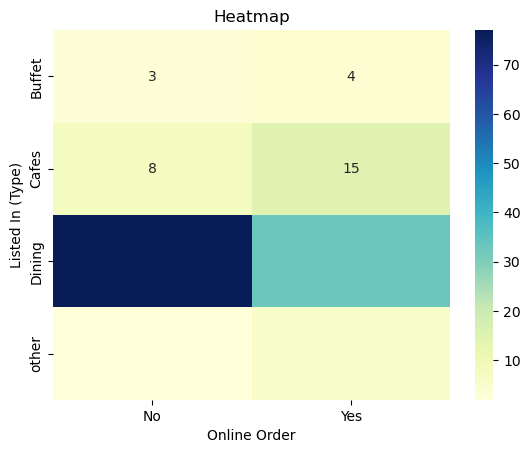

In [75]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table,annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

In [76]:
# Conclusion: Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders.
# This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.